##  Stochastic RNA velocity analysis of Forebrain Glut using scRNAvelo

We use a stochastic version of the model for transcriptional dynamics used in velocyto (developed by the Linnarsson lab and Kharchenko Lab).

RNA velocity reference https://www.nature.com/articles/s41586-018-0414-6 <br>

Files needed: hgForebrainGlut.loom (will be downloaded automatically)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.16 on 2019-03-25 21:27.


In [2]:
scv.settings.set_figure_params('scvelo')

## Load and cleanup the data

In [3]:
adata = scv.read("../data/velocyto/PM1005_merged.loom", sparse=True, cache=True)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [14]:
scv.pp.show_proportions(adata)
scv.pp.cleanup(adata, clean='all')

adata

Abundance of ['spliced', 'unspliced']: [0.83 0.17]


## Preprocess the data

In [5]:
scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10, n_top_genes=4000)

Filtered out 16241 genes that are detected in less than 20 counts (spliced).
Filtered out 2647 genes that are detected in less than 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


In [6]:
scv.pp.moments(adata)

computing neighbors
    finished (0:00:10.10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:02.40) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


## Compute velocity and velocity graph

In [7]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:02.17) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [8]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:02:55.88) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Project the velocity graph onto an embedding

In [17]:
scv.tl.louvain(adata, resolution=.7, random_state=4)

## Cluster and annotate the data

In [19]:
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:03.25) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:02:28.71) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [21]:
scv.tl.velocity_embedding(adata, basis='pca')

computing velocity embedding
    finished (0:00:04.40) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


<Figure size 700x500 with 0 Axes>

In [22]:
scv.tl.terminal_states(adata)

computing terminal states
    identified 2 root cells and 3 end points
    finished (0:00:02.03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


<Figure size 700x500 with 0 Axes>

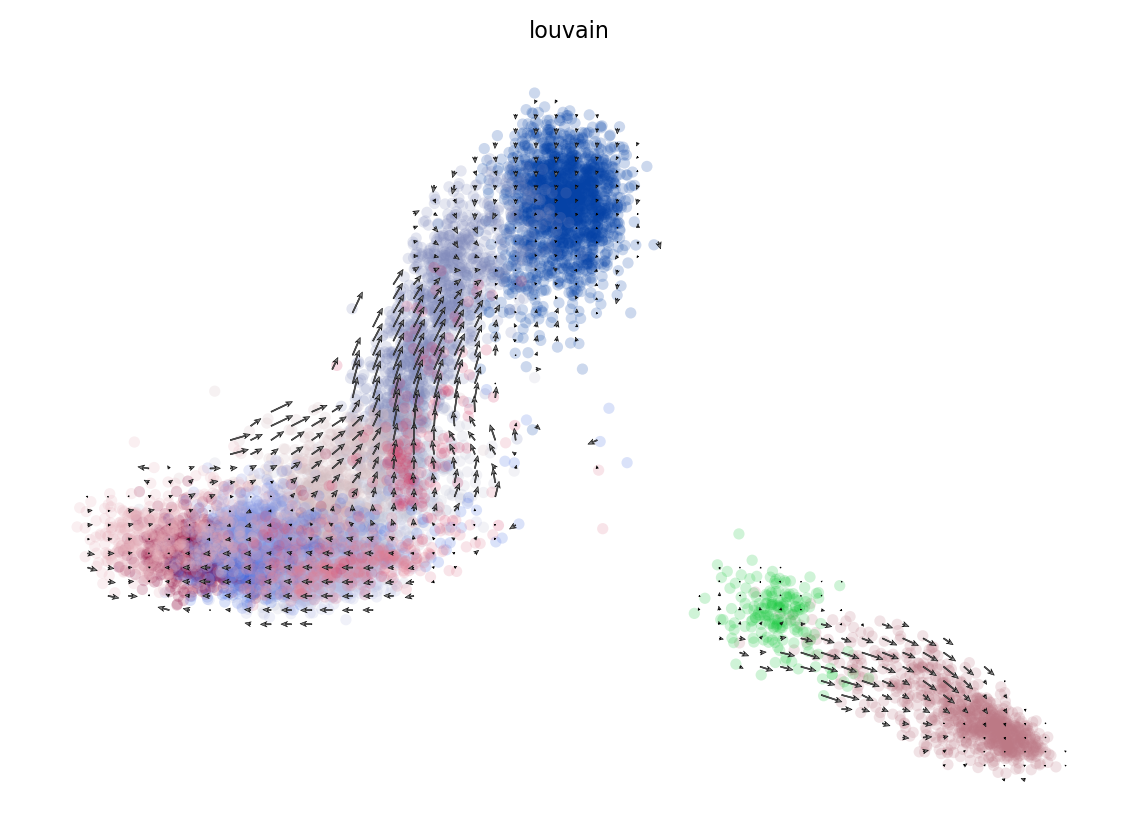

In [23]:
scv.pl.velocity_embedding_grid(adata, basis='pca')

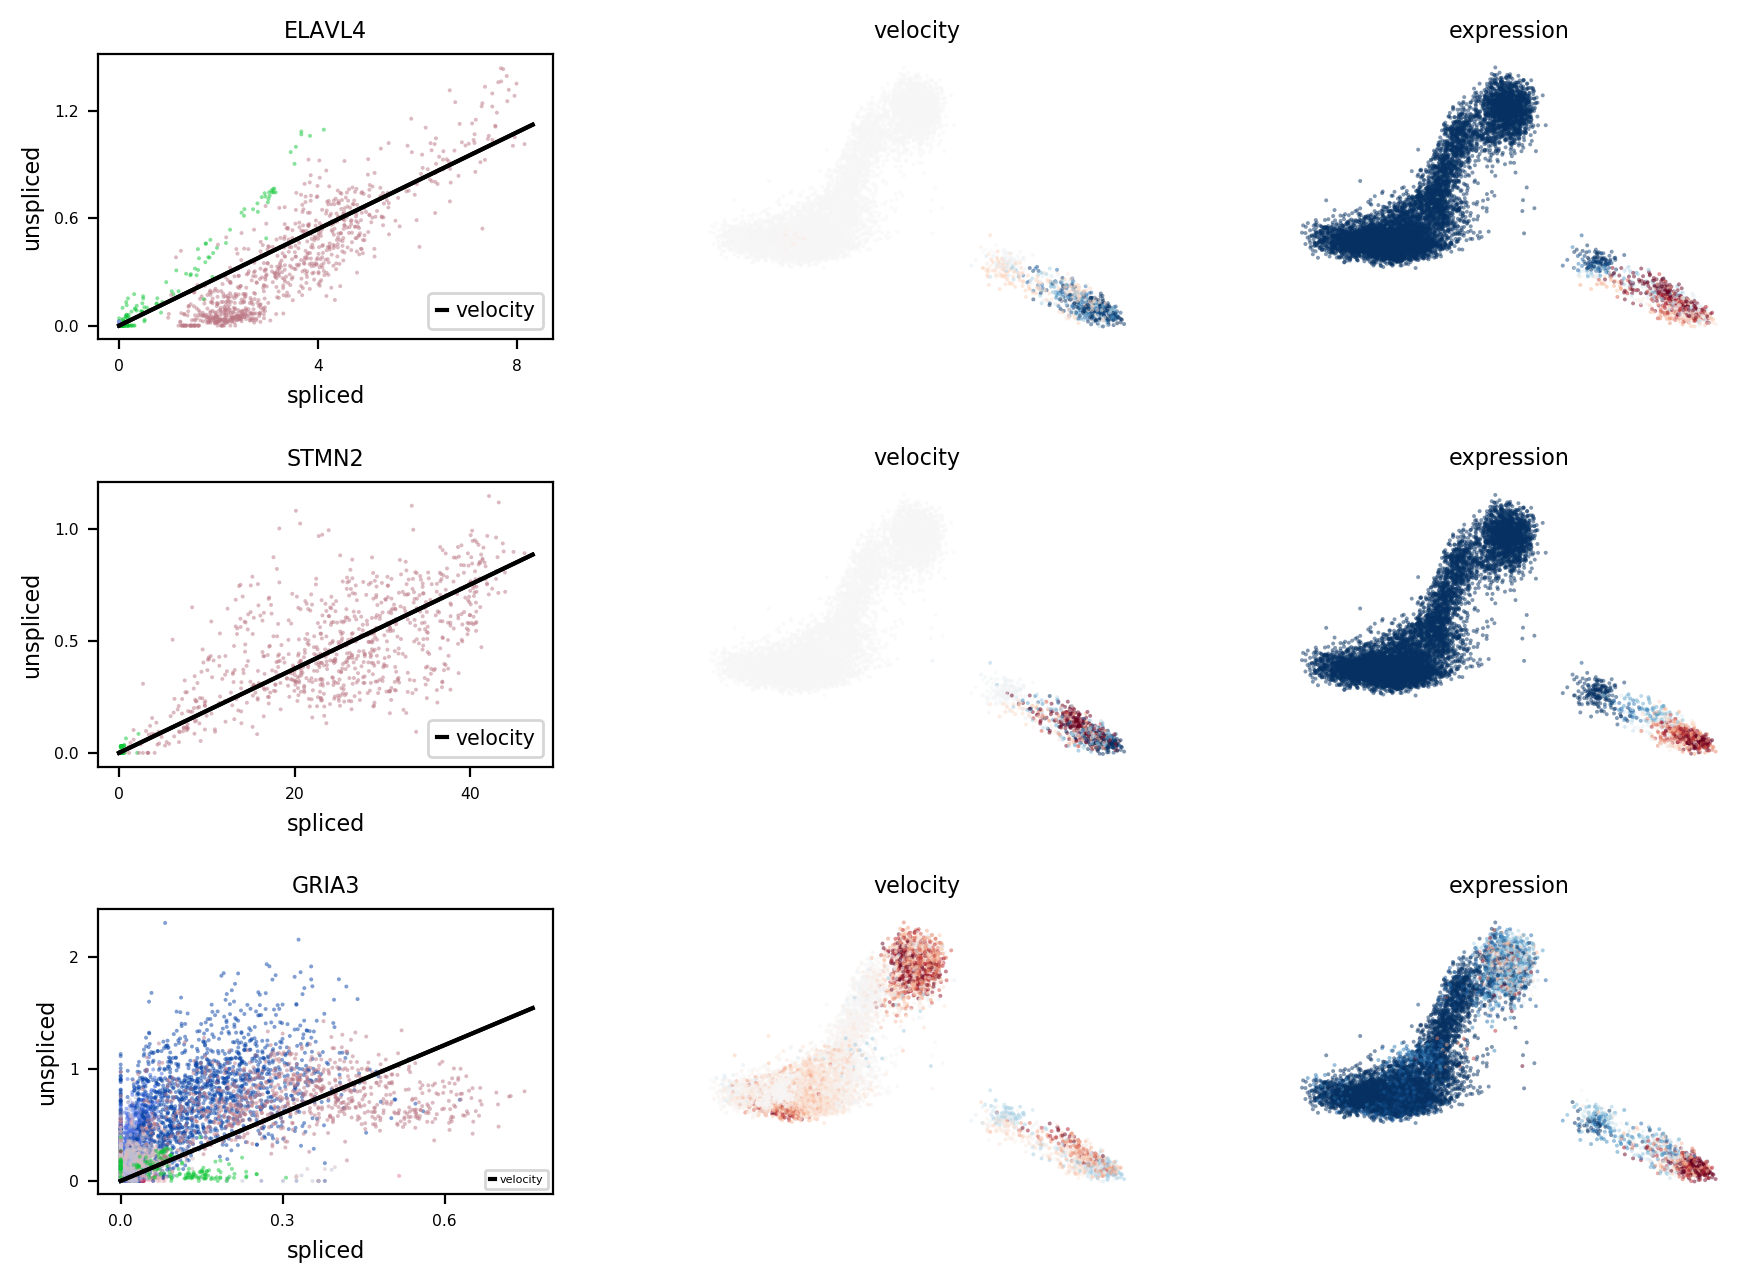

In [24]:
scv.pl.velocity(adata, basis='pca', var_names=["ELAVL4", "STMN2", "GRIA3"])

In [20]:
?scv.tl.velocity_embedding